# Classifiers introduction

In the following program we introduce the basic steps of classification of a dataset in a matrix

Import the package for learning and modeling trees

In [1]:

from sklearn import tree 

Define the matrix containing the data (one example per row)
and the vector containing the corresponding target value

In [2]:
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]
Y = [1, 0, 0, 0, 1, 1]

Declare the classification model you want to use and then fit the model to the data

In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Predict the target value (and print it) for the passed data, using the fitted model currently in clf

In [4]:
print(clf.predict([[0, 1, 1]]))

[0]


In [5]:
print(clf.predict([[1, 0, 1],[0, 0, 1]]))

[1 0]


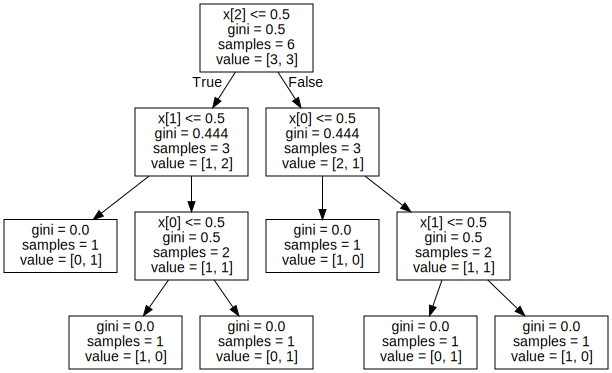

In [6]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

In the following we start using a dataset (from UCI Machine Learning repository)

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

# Declare the type of prediction model and the working criteria for the model induction algorithm

In [8]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})

# Split the dataset in training and test set

In [9]:
# Generate a random permutation of the indices of examples that will be later used 
# for the training and the test set
import numpy as np
np.random.seed(0)
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

# Fit the learning model on training set

In [10]:
# fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

# Obtain predictions

In [11]:
# apply fitted model "clf" to the test set 
predicted_y_test = clf.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test) 
print(iris.target_names)

Predictions:
[1 2 1 0 0 0 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]
['setosa' 'versicolor' 'virginica']


Print the index of the test instances and the corresponding predictions

In [12]:
# print the corresponding instances indexes and class names 
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
Predicted: versicolor	 True: versicolor

Instance # 70: 
Predicted: virginica	 True: versicolor

Instance # 87: 
Predicted: versicolor	 True: versicolor

Instance # 36: 
Predicted: setosa	 True: setosa

Instance # 21: 
Predicted: setosa	 True: setosa

Instance # 9: 
Predicted: setosa	 True: setosa

Instance # 103: 
Predicted: virginica	 True: virginica

Instance # 67: 
Predicted: versicolor	 True: versicolor

Instance # 117: 
Predicted: virginica	 True: virginica

Instance # 47: 
Predicted: setosa	 True: setosa



# Look at the specific examples

In [13]:
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test)+": ")
    s=""
    for j in range(len(iris.feature_names)):
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if (j<len(iris.feature_names)-1): s=s+", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.6, sepal width (cm)=3.0, petal length (cm)=4.1, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.9, sepal width (cm)=3.2, petal length (cm)=4.8, petal width (cm)=1.8
Predicted: virginica	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=6.3, sepal width (cm)=2.3, petal length (cm)=4.4, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.5, sepal width (cm)=3.5, petal length (cm)=1.3, petal width (cm)=0.2
Predicted: setosa	 True: setosa

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.1, sepal width (cm)=3.7, petal length (cm)=1.5, petal width (cm)=0.4
Predicted: setosa	 True: setosa

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=4.9, sepal width (c

# Obtain model performance results

In [14]:
# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

Accuracy score: 0.9
F1 score: 0.8857142857142858


# Use Cross Validation

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, GridSearchCV  # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

[0.96666667 1.         0.86666667 0.86666667 1.        ]


In [16]:
# computes F1- score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scores)

[0.96658312 1.         0.86111111 0.86666667 1.        ]


# Show the resulting tree 

## 1. Print the picture in a PDF file

In [17]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("my_iris_predictions")

'my_iris_predictions.pdf'

## 2. Generate a picture here

In [18]:
print(list(iris.feature_names))
print(list(iris.target_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


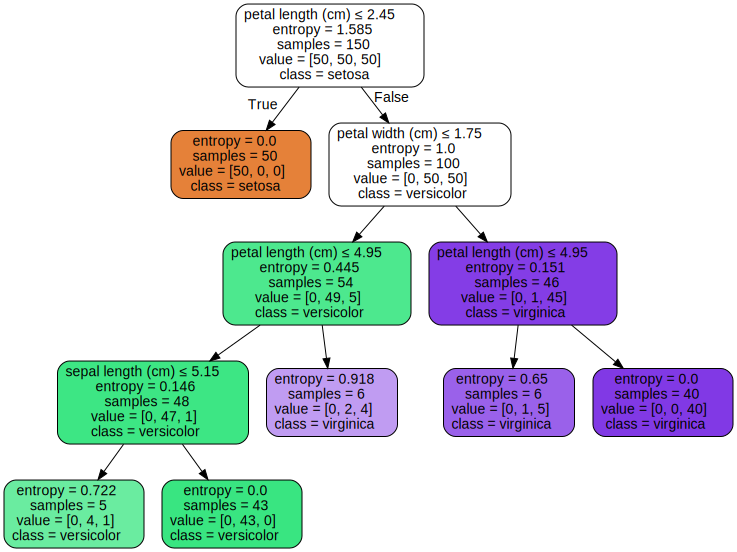

In [19]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## ES 1

In [20]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split  # will be used to separate training and test
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42, stratify=iris.target)
class_to_oversample = 1
indeces_to_oversample = np.where(y_train == class_to_oversample)[0]

X_over,y_over = resample(
    X_train[indeces_to_oversample],
    y_train[indeces_to_oversample],
    replace=True,
    n_samples=len(indeces_to_oversample) * 10,
    random_state = 0
)

X_over = np.concatenate((X_train, X_over), axis=0)
y_over = np.concatenate((y_train, y_over), axis=0)

In [21]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

clf_boosted = DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf_boosted = clf_boosted.fit(X_over, y_over)
predicted_y_boosted = clf_boosted.predict(X_test)

acc_score = accuracy_score(y_test, predicted_y_boosted)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(y_test, predicted_y_boosted, average='macro')
print("F1 score: "+str(f1))

Accuracy score: 0.9333333333333333
F1 score: 0.9326599326599326


## ES 1.b

In [49]:
clf_weighted = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:10})
clf_weighted = clf_weighted.fit(X_train, y_train)

predicted_y_weighted = clf_weighted.predict(X_test)

acc_score = accuracy_score(y_test, predicted_y_weighted)
print("Accuracy score: ", acc_score)
f1=f1_score(y_test, predicted_y_weighted, average='macro')
print("F1 score: "+str(f1))

Accuracy score:  0.9
F1 score: 0.899749373433584


# ES 2

In [43]:
clf_tuning = tree.DecisionTreeClassifier()
param_grid={'criterion': ['gini', 'entropy','log_loss'],
            'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,11,12],
            'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12],
            'min_impurity_decrease': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
            'class_weight': [{0:1,1:1,2:1},{0:1,1:1,2:2},{0:1,1:2,2:1},{0:1,1:1,2:3},{0:1,1:3,2:1},{0:2,1:3,2:3}, {0:1,1:1,2:10}]
            }
grid_search = GridSearchCV(estimator=clf_tuning, param_grid=param_grid,cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
# grid_search.fit(iris.data, iris.target)
print("Migliori parametri trovati:", grid_search.best_params_)
print("Miglior punteggio (accuracy):", grid_search.best_score_)

# Predizioni sui dati di test
best_model = grid_search.best_estimator_
predicted_y_tuning = best_model.predict(X_test)

# Valutazione
test_accuracy = accuracy_score(y_test, predicted_y_tuning)
print("Accuracy sui dati di test:", test_accuracy)

Migliori parametri trovati: {'class_weight': {0: 1, 1: 1, 2: 1}, 'criterion': 'gini', 'max_depth': 2, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 1}
Miglior punteggio (accuracy): 0.9583333333333334
Accuracy sui dati di test: 0.9333333333333333


# ES3
Build the confusion matrix of the created tree models on the test set and show them.


BOOSTED

In [68]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(predicted, actual):
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

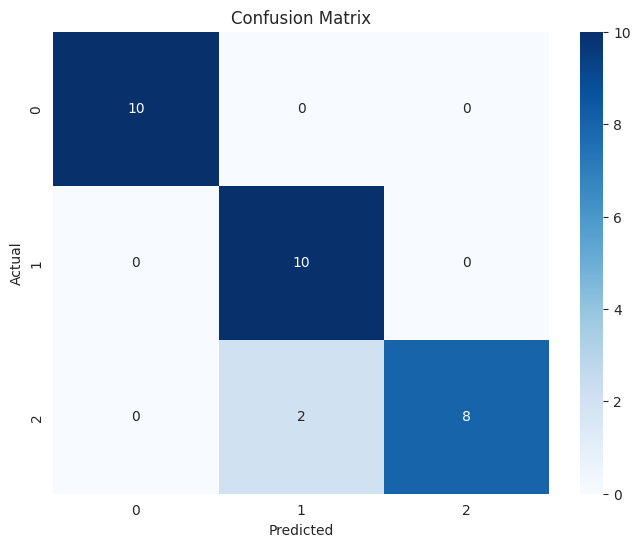

In [69]:
plot_confusion_matrix(predicted_y_boosted, y_test)

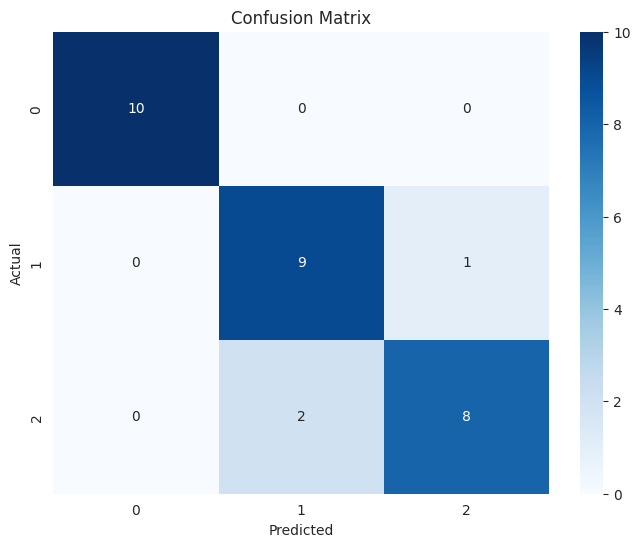

In [70]:
plot_confusion_matrix(predicted_y_weighted, y_test)

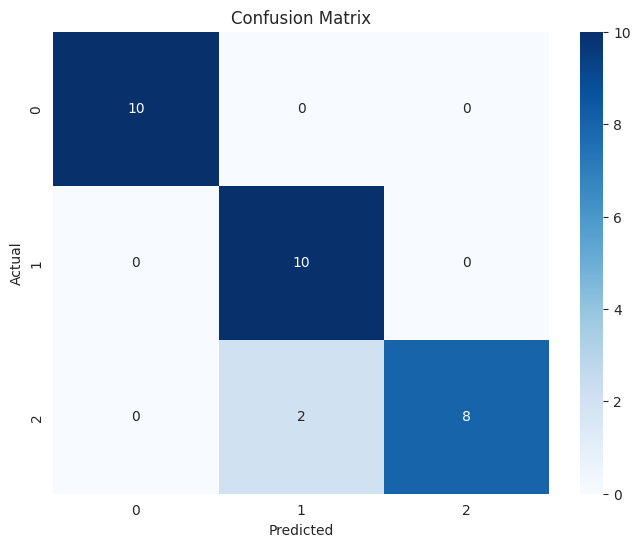

In [71]:
plot_confusion_matrix(predicted_y_tuning, y_test)

# ES 4
Build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created: for each model you have to build three curves, one for each class, considered in turn as the positive class.

BOOSTED CLASSE SETOSA

In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

converter = lambda vector, positive_class: list(map(lambda x: 0 if x == positive_class else 1, vector))


def plot_roc_curve(predicted, actual):
    first_class_0_predicted = converter(predicted,0)
    first_class_1_predicted = converter(predicted,1)
    first_class_2_predicted = converter(predicted,2)

    first_class_0_test = converter(actual,0)
    first_class_1_test = converter(actual,1)
    first_class_2_test = converter(actual,2)

    # Calcolo della ROC curve
    fpr0, tpr0, th0 = roc_curve(first_class_0_test, first_class_0_predicted)
    fpr1, tpr1, th1 = roc_curve(first_class_1_test, first_class_1_predicted)
    fpr2, tpr2, th2 = roc_curve(first_class_2_test, first_class_2_predicted)

    #AUC
    roc_auc_0 = auc(fpr0, tpr0)
    roc_auc_1 = auc(fpr1, tpr1)
    roc_auc_2 = auc(fpr2, tpr2)

    # Tracciamento della ROC curve
    plt.figure(figsize=(9, 5))
    plt.plot(fpr0, tpr0, color='blue', lw=2, label=f'ROC curve 0 (area = {roc_auc_0:.2f})')
    plt.plot(fpr1, tpr1, color='red', lw=2, label=f'ROC curve 1 (area = {roc_auc_1:.2f})')
    plt.plot(fpr2, tpr2, color='orange', lw=2, label=f'ROC curve 2 (area = {roc_auc_2:.2f})')


    plt.plot([0, 0, 1], [0, 1, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


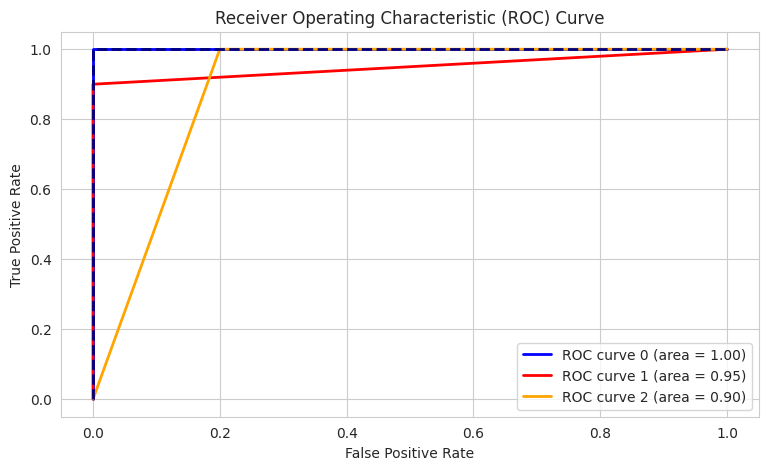

In [65]:
plot_roc_curve(predicted_y_boosted, y_test)

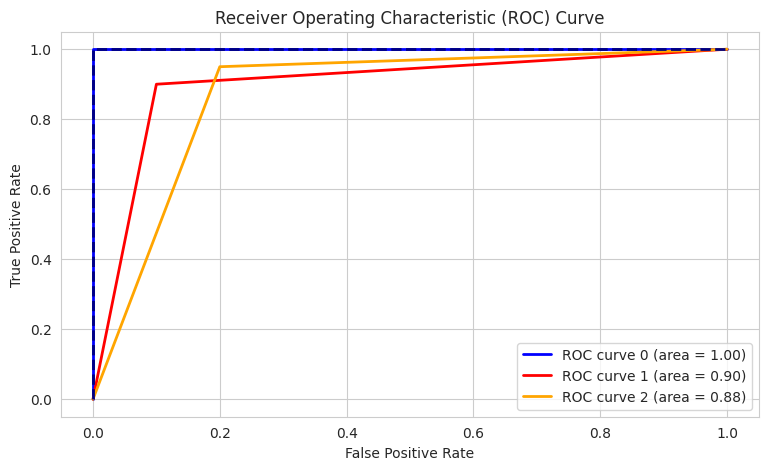

In [66]:
plot_roc_curve(predicted_y_weighted, y_test)

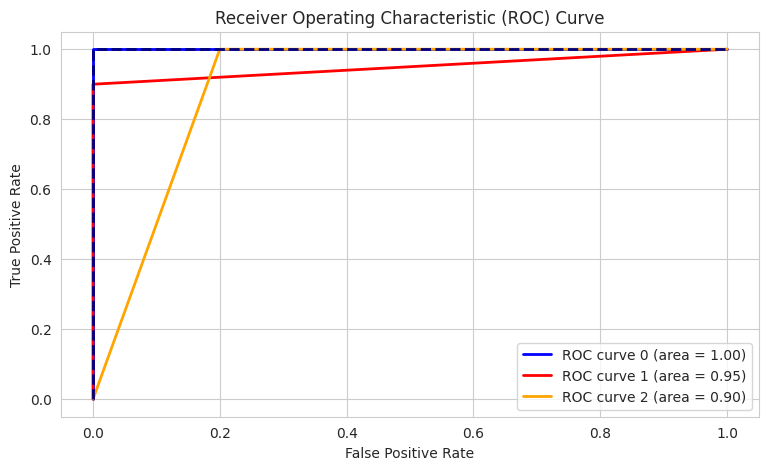

In [67]:
plot_roc_curve(predicted_y_tuning, y_test)